In [1]:
import numpy as np
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13256\4248217707.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# connect to the SQL server database
conn = pyodbc.connect(
    '''
    DRIVER={ODBC Driver 17 for SQL Server};
    SERVER=DESKTOP-7CB1RAA;
    DATABASE=CompanyX;
    Trusted_Connection=yes;
    '''
    )

# create a cursor to fetch data
cursor = conn.cursor()

### a) Top 10 products sales

In [3]:
query1 = """
select p.Name, COUNT(s.ProductID) as prodCount 
from [CompanyX].[Sales].[SalesOrderDetail] as s
inner join [CompanyX].[Production].[Product] as p
	on s.ProductID = p.ProductID
group by p.Name
order by prodCount desc
"""

cursor.execute(query1)
result = cursor.fetchall()
newRes1 = pd.DataFrame(np.asarray(result), columns=['Product','Count'])
# cast the read data from string to float => More easy to plot
newRes1['Count'] = newRes1['Count'].astype(float)
# pd.to_numeric(newRes1['Count'], downcast='integer')

product = newRes1['Product'].head(10)
count = newRes1['Count'].head(10)

print(type(count[0]))


<class 'numpy.float64'>


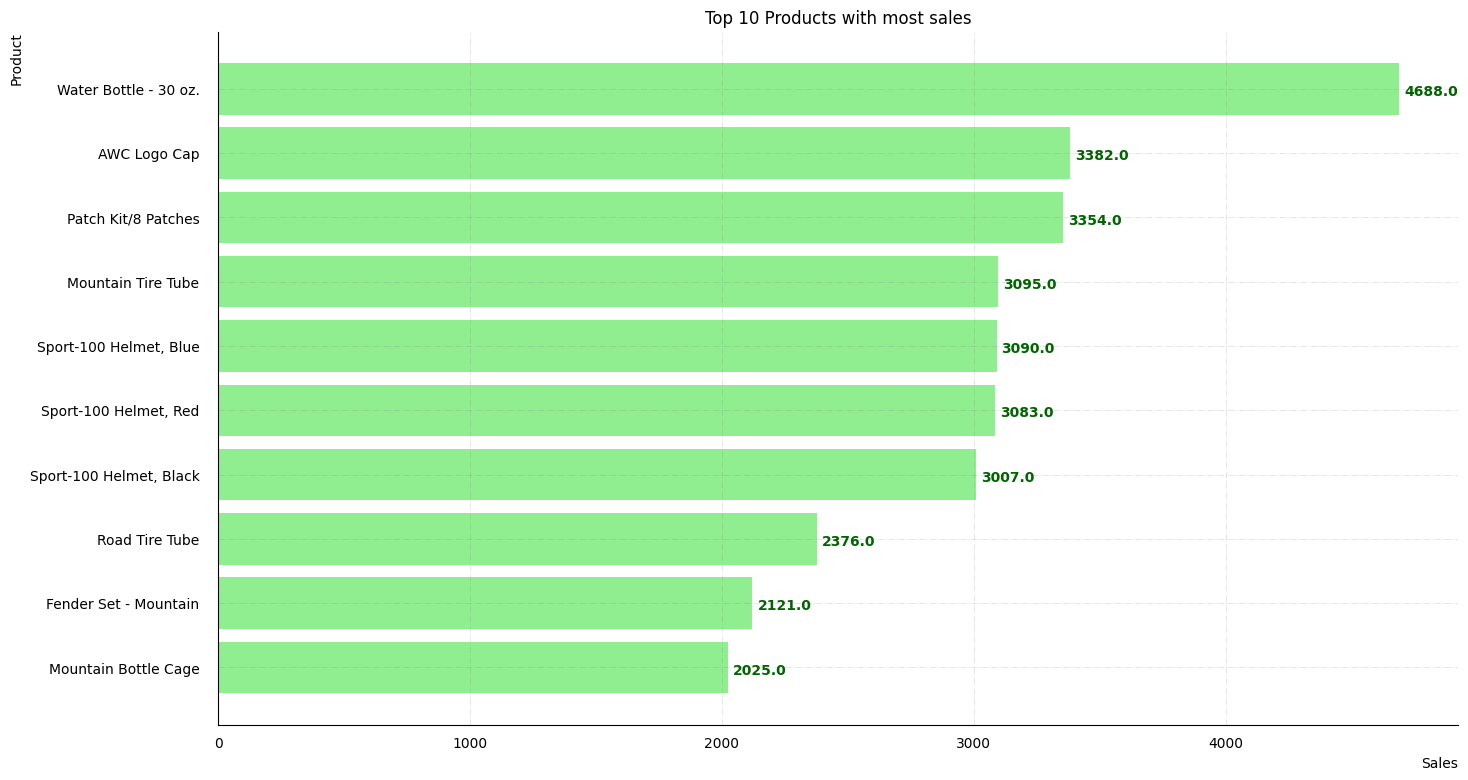

In [4]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
bars =  ax.barh(product, count, color='lightgreen')

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.7,alpha = 0.2)

# Show top values 
ax.invert_yaxis()

# plt.xlabel('Sales')
# plt.ylabel('Product')
ax.set_ylabel('Product', loc='top')
ax.set_xlabel('Sales', loc='right')
ax.set_title("Top 10 Products with most sales")

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+20, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='darkgreen')

# Show Plot
plt.show()


### b) Which geographic regions generate the most sales?

In [5]:
query2 = """
select 
	concat(st.Name, ',',' ', st.CountryRegionCode) as region,
	sum(sd.LineTotal) as totalSales
from [CompanyX].[Sales].[SalesTerritory] as st
inner join [CompanyX].[Sales].[SalesOrderHeader] as sh
	on st.TerritoryID = sh.TerritoryID
inner join [CompanyX].[Sales].[SalesOrderDetail] as sd
	on sh.SalesOrderID = sd.SalesOrderID
group by concat(st.Name, ',',' ', st.CountryRegionCode)
order by totalSales desc
"""

cursor.execute(query2)
result = cursor.fetchall()
newRes2 = pd.DataFrame(np.asarray(result), columns=['Region','Sales'])
newRes2['Sales'] = newRes2['Sales'].astype(float)
# pd.to_numeric(newRes1['Count'], downcast='integer')


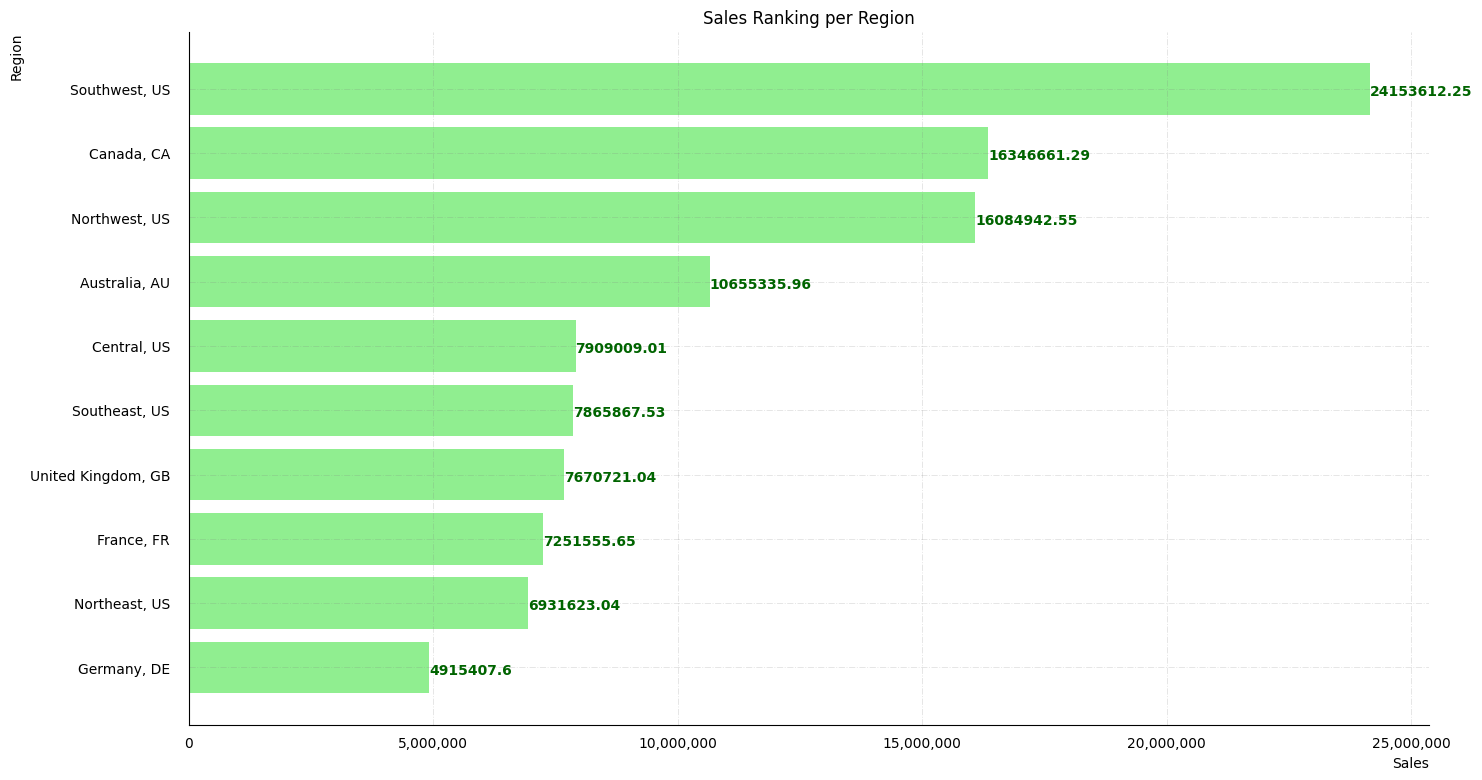

In [6]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
bars =  ax.barh(newRes2['Region'], newRes2['Sales'], color='lightgreen')

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.7,alpha = 0.2)

# Show top values 
ax.invert_yaxis()

ax.set_ylabel('Region', loc='top')
ax.set_xlabel('Sales', loc='right')
ax.set_title("Sales Ranking per Region")

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+20, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='darkgreen')
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))
# Show Plot
plt.show()

### c) Sales trend over time ?

In [7]:
query3 = '''
select
	YEAR(OrderDate) as year_,
	MONTH(OrderDate) as month_,
	sum(LineTotal) as totalSales
from [CompanyX].[Sales].[SalesOrderDetail] sd
inner join [CompanyX].[Sales].[SalesOrderHeader] as sh
	on sd.SalesOrderID = sh.SalesOrderID
group by YEAR(OrderDate), MONTH(OrderDate)
order by YEAR(OrderDate), MONTH(OrderDate)
'''

cursor.execute(query3)
result = cursor.fetchall()
newRes3 = pd.DataFrame(np.asarray(result), columns=['Year', 'Month','Money'])
# newRes3['Money'] = newRes3['Money'].astype(float).round(2)
newRes3['Money'] = newRes3['Money'].astype(int)
newRes3['YearMonth'] = newRes3['Year'].astype(str) + '-' + newRes3['Month'].astype(str)
display(newRes3)

,Year,Month,Money,YearMonth
0,2011,5,442160,2011-5
1,2011,6,458910,2011-6
2,2011,7,2044600,2011-7
3,2011,8,2495816,2011-8
4,2011,9,502073,2011-9
5,2011,10,4588761,2011-10
6,2011,11,737839,2011-11
7,2011,12,1309863,2011-12
8,2012,1,3970627,2012-1
9,2012,2,1475426,2012-2


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13256\4253883255.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(newRes3['YearMonth'],rotation=90)


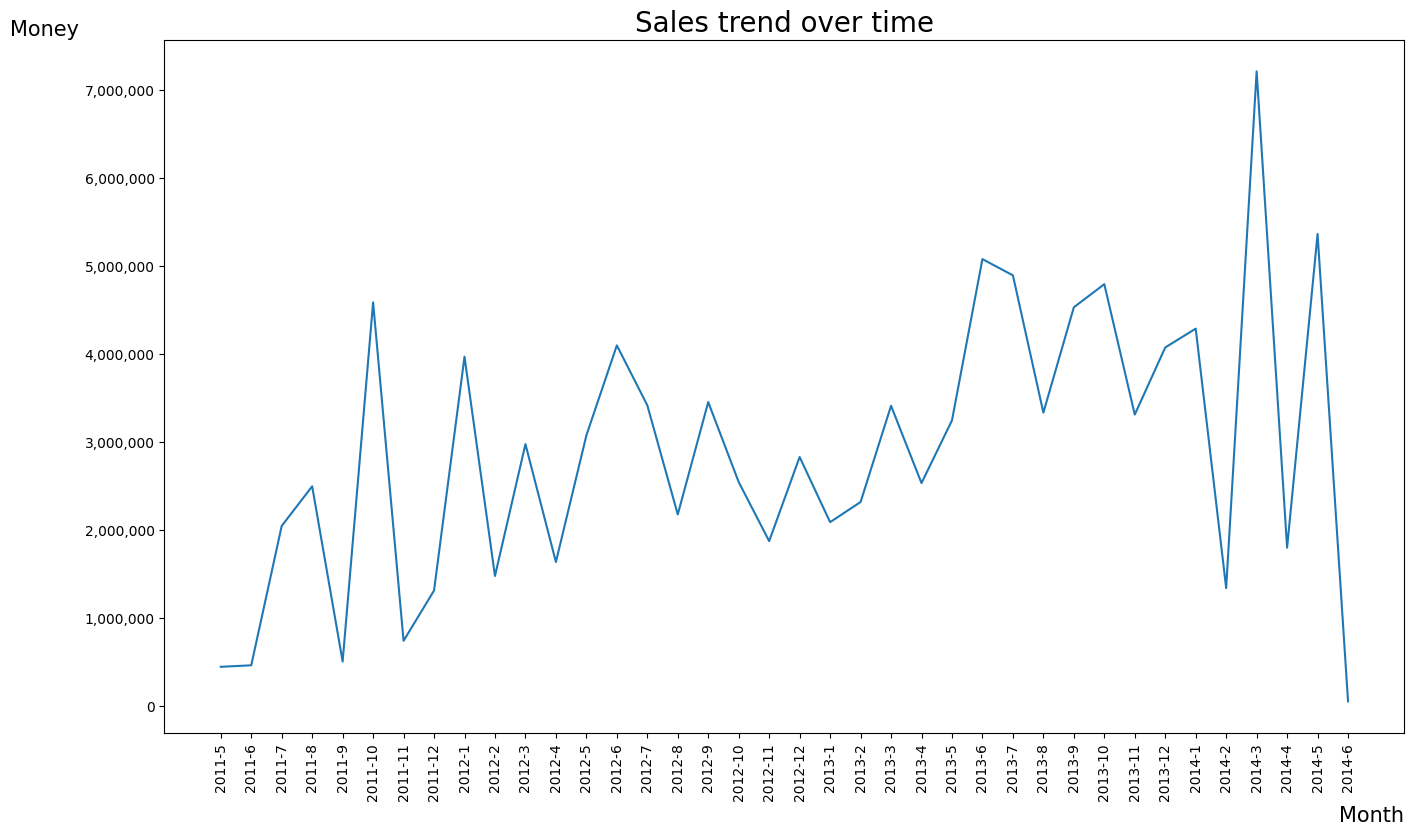

In [8]:
fig, ax = plt.subplots(figsize =(16, 9))

ax.plot(newRes3['YearMonth'],newRes3['Money'])

ax.set_ylabel('Money', loc='top', rotation=0, fontsize=15)
ax.set_xlabel('Month', loc='right', fontsize=15)
ax.set_title("Sales trend over time", fontsize=20)
ax.set_xticklabels(newRes3['YearMonth'],rotation=90)
ax.get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))

# ax.xaxis.axis_date()


plt.show()

### d) Sales trend between customer and reseller

In [9]:
query4_1 = '''
select 
	YEAR(soh.OrderDate) as year_,
	MONTH(soh.OrderDate) as month_,
	sum(soh.SubTotal) as totalSales
from [CompanyX].[Sales].[SalesOrderHeader] as soh
join [CompanyX].[Sales].[Customer] as cu
	on soh.CustomerID = cu.CustomerID
join [CompanyX].[Person].[Person] as pe
	on cu.PersonID = pe.BusinessEntityID
where pe.PersonType = 'IN'
group by YEAR(OrderDate), MONTH(OrderDate)
order by YEAR(OrderDate), MONTH(OrderDate)
'''

cursor.execute(query4_1)
result = cursor.fetchall()
newRes4_1 = pd.DataFrame(np.asarray(result), columns=['Year', 'Month','Money'])
# newRes3['Money'] = newRes3['Money'].astype(float).round(2)
newRes4_1['Money'] = newRes4_1['Money'].astype(int)
newRes4_1['YearMonth'] = newRes4_1['Year'].astype(str) + '-' + newRes4_1['Month'].astype(str)
display(newRes4_1)

,Year,Month,Money,YearMonth
0,2011,5,14477,2011-5
1,2011,6,458910,2011-6
2,2011,7,506191,2011-7
3,2011,8,485198,2011-8
4,2011,9,502073,2011-9
5,2011,10,561681,2011-10
6,2011,11,737839,2011-11
7,2011,12,596746,2011-12
8,2012,1,614557,2012-1
9,2012,2,592526,2012-2


In [10]:
query4_2 = '''
select 
	YEAR(soh.OrderDate) as year_,
	MONTH(soh.OrderDate) as month_,
	sum(soh.SubTotal) as totalSales
from [CompanyX].[Sales].[SalesOrderHeader] as soh
join [CompanyX].[Sales].[Customer] as cu
	on soh.CustomerID = cu.CustomerID
join [CompanyX].[Person].[Person] as pe
	on cu.PersonID = pe.BusinessEntityID
where pe.PersonType = 'SC'
group by YEAR(OrderDate), MONTH(OrderDate)
order by YEAR(OrderDate), MONTH(OrderDate)
'''

cursor.execute(query4_2)
result = cursor.fetchall()
newRes4_2 = pd.DataFrame(np.asarray(result), columns=['Year', 'Month','Money'])
# newRes3['Money'] = newRes3['Money'].astype(float).round(2)
newRes4_2['Money'] = newRes4_2['Money'].astype(int)
newRes4_2['YearMonth'] = newRes4_2['Year'].astype(str) + '-' + newRes4_2['Month'].astype(str)
display(newRes4_2)



,Year,Month,Money,YearMonth
0,2011,5,427683,2011-5
1,2011,7,1538408,2011-7
2,2011,8,2010618,2011-8
3,2011,10,4027080,2011-10
4,2011,12,713116,2011-12
5,2012,1,3356069,2012-1
6,2012,2,882899,2012-2
7,2012,3,2269116,2012-3
8,2012,4,1001803,2012-4
9,2012,5,2393689,2012-5


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13256\2581698817.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(merged_df['YearMonth'],rotation=90)


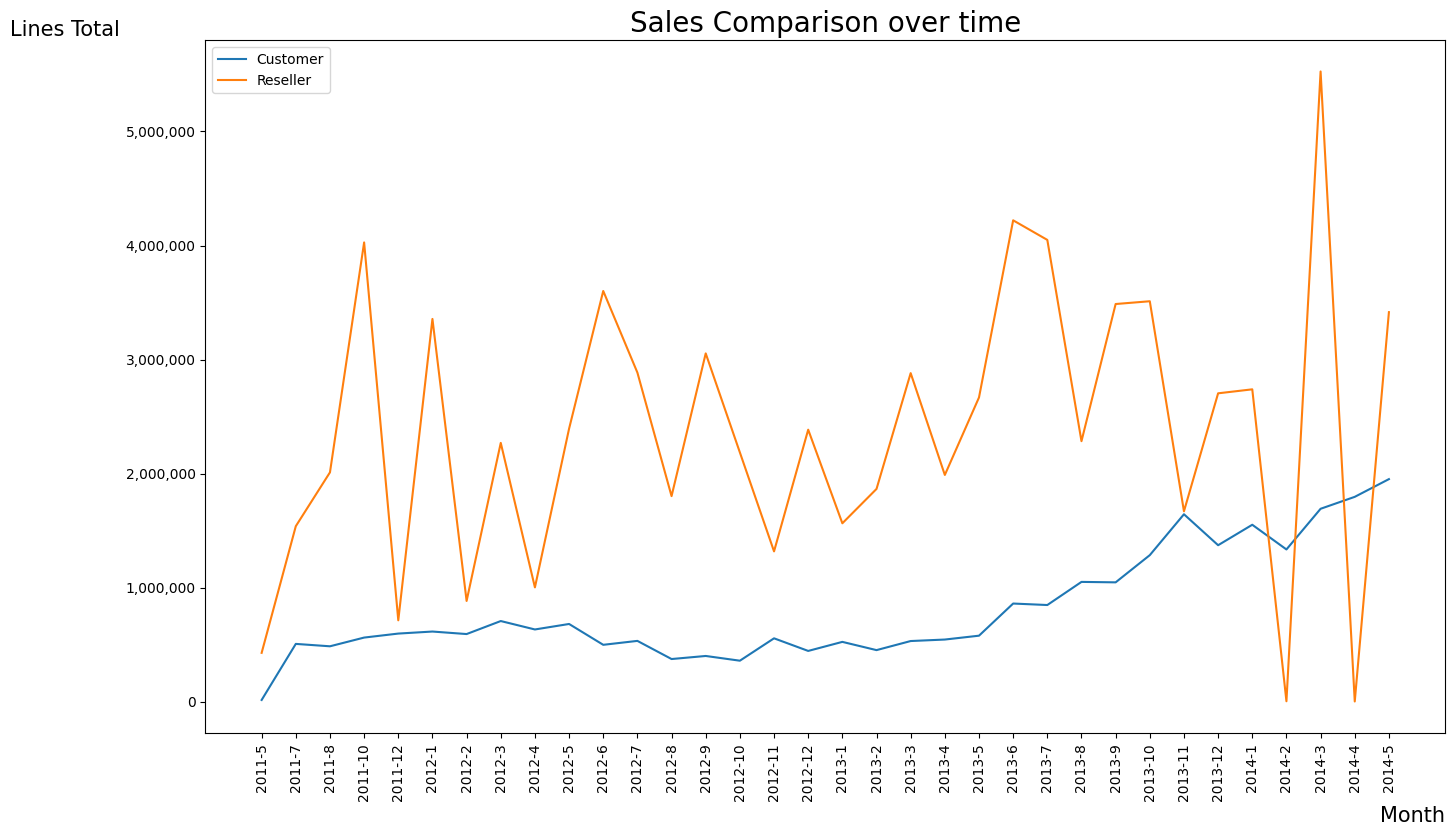

In [11]:
merged_df = newRes4_1.merge(newRes4_2, how='inner', on='YearMonth')
merged_df.fillna(0, inplace=True)



fig, ax = plt.subplots(figsize =(16, 9))

ax.plot(merged_df['YearMonth'] , merged_df['Money_x'], label='Customer')
ax.plot(merged_df['YearMonth'] , merged_df['Money_y'], label='Reseller')


ax.legend()  # This line is added
# ax.grid()
ax.set_ylabel('Lines Total', loc='top', rotation=0, fontsize=15)
ax.set_xlabel('Month', loc='right', fontsize=15)
ax.set_title("Sales Comparison over time", fontsize=20)
ax.set_xticklabels(merged_df['YearMonth'],rotation=90)
ax.get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(int(x), ',')))

### e) Top 10 product liked by Reseller

In [12]:
query5 = """
select 
	p.Name, 
	COUNT(sod.ProductID) as prodCount
from [CompanyX].[Sales].[SalesOrderDetail] as sod
join [CompanyX].[Production].[Product] as p
	on sod.ProductID = p.ProductID
join [CompanyX].[Sales].[SalesOrderHeader] soh
	on sod.SalesOrderID = soh.SalesOrderID
where soh.SalesPersonID IS NOT NULL
group by p.Name
order by prodCount desc
"""

cursor.execute(query5)
result = cursor.fetchall()
newRes5 = pd.DataFrame(np.asarray(result), columns=['Product','Count'])
# cast the read data from string to float => More easy to plot
newRes5['Count'] = newRes5['Count'].astype(float)
# pd.to_numeric(newRes1['Count'], downcast='integer')

product = newRes5['Product'].head(12)
count = newRes5['Count'].head(12)



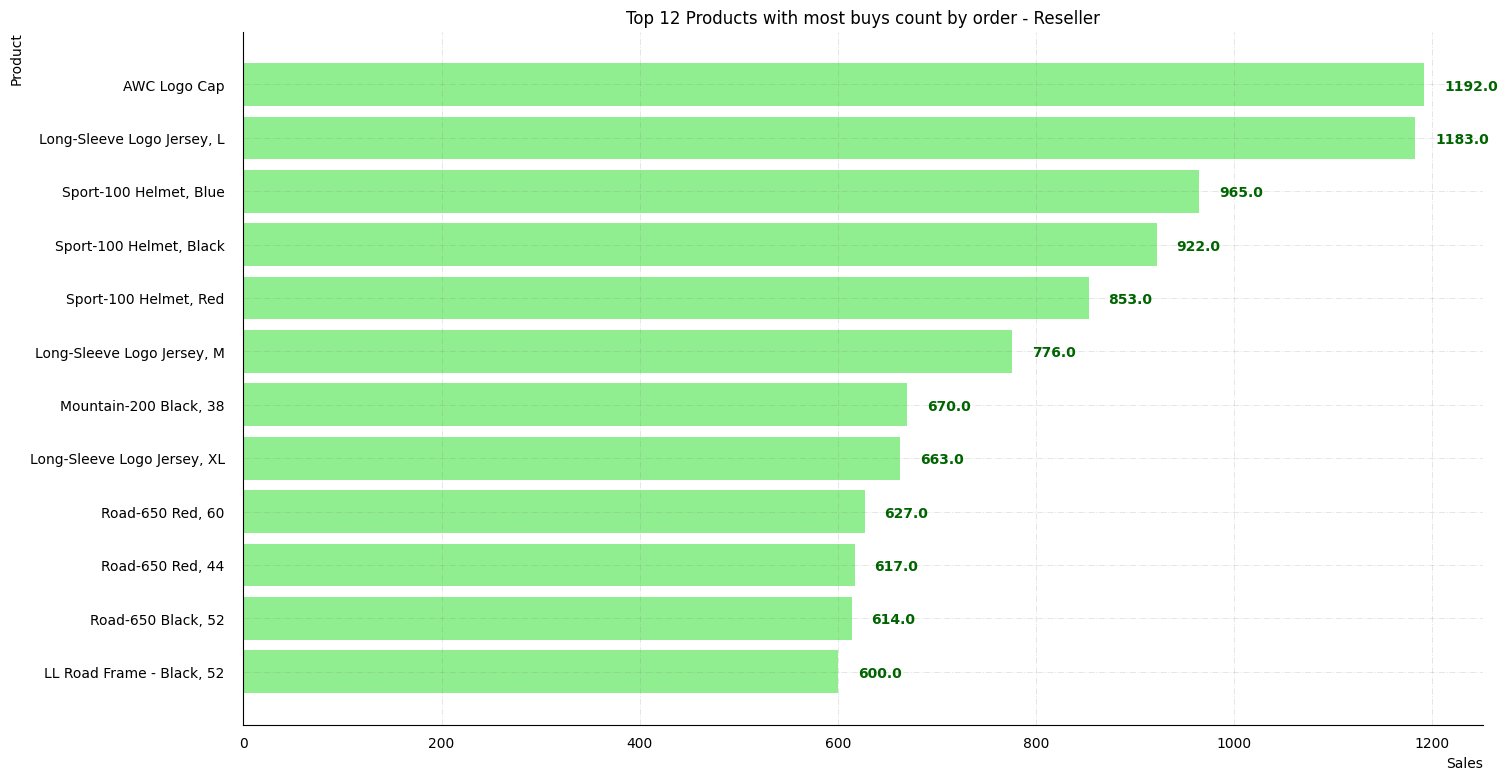

In [13]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
bars =  ax.barh(product, count, color='lightgreen')

# Remove axes splines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(color ='grey',linestyle ='-.', linewidth = 0.7,alpha = 0.2)

# Show top values 
ax.invert_yaxis()

# plt.xlabel('Sales')
# plt.ylabel('Product')
ax.set_ylabel('Product', loc='top')
ax.set_xlabel('Sales', loc='right')
ax.set_title("Top 12 Products with most buys count by order - Reseller")

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+20, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='darkgreen')

# Show Plot
plt.show()